In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-30 20:49:56,800 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:49:56,802 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:49:56,803 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:49:56,807 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-30 20:49:56,808 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:49:56,821 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-30 20:49:57,253 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:49:57,257 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:49:57,259 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:49:57,259 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:49:57,260 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:49:57,261 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:49:57,262 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:49:57,264 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:49:57,712 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-30 20:49:57,937 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:49:57,939 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:49:57,940 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:49:57,945 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:49:58,438 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 2
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136008425132, 864691135865518469, 864691135945413668,
       864691136003930314, 864691136194042326])


--- Working on Neuron 864691136008425132 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [448259.32162313 929180.42227274 595240.52885951]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [448259.32162313 929180.42227274 595240.52885951] had error branches []--------


 ----- Working on coordinate 1: [454872.55702616 942312.43796309 625067.76186852]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [454872.55702616 942312.43796309 625067.76186852] had error branches []--------


 ----- Working on coordinate 2: [455453.60028452 951632.94334923 635549.81113486]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [455453.60028452 951632.94334923 635549.81113486] had error branches []--------


 ----- Working on coordinate 3: [455889.24925506 955155.01994705 639144.98788184]--------
kiss_check = True
winning_downstream = None,error_downs

** triggered kiss check cut becuase cut_bbox_longest_side = 365.040626502363***
winning_downstream = 239,error_downstream = [286 291] 
coordinate [ 721798.96957484 1053960.4924751   750476.38118716] had error branches [286 291]--------


 ----- Working on coordinate 28: [ 722150.44935862 1037207.86873873  756111.36048753]--------
kiss_check = True
winning_downstream = None,error_downstream = [292 295 282] 
coordinate [ 722150.44935862 1037207.86873873  756111.36048753] had error branches [292 295 282]--------


 ----- Working on coordinate 29: [ 722286.07804189 1034118.53311866  740815.52395811]--------
kiss_check = True
winning_downstream = 299,error_downstream = [281 284 302] 
coordinate [ 722286.07804189 1034118.53311866  740815.52395811] had error branches [281 284 302]--------


 ----- Working on coordinate 30: [ 722712.78850063 1030412.73749769  740973.22765106]--------
kiss_check = True
winning_downstream = None,error_downstream = [269 274 279 280 287 288 298 304 306] 
coordinat

winning_downstream = 365,error_downstream = [361 367 351] 
coordinate [ 729647.30558753 1025296.09297579  746849.85200351] had error branches [361 367 351]--------


 ----- Working on coordinate 41: [ 731676.49155351 1026024.38018178  746444.06122284]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [372, 378]
winning_downstream = 378,error_downstream = [377 372] 
coordinate [ 731676.49155351 1026024.38018178  746444.06122284] had error branches [377 372]--------


 ----- Working on coordinate 42: [ 731718.23467221 1055048.14200034  757538.6748774 ]--------
kiss_check = True
winning_downstream = 384,error_downstream = [345 358] 
coordinate [ 731718.23467221 1055048.14200034  757538.6748774 ] had error branches [345 358]--------


 ----- Working on coordinate 43: [ 734974.93033631 1026919.28073107  754190.34741706]--------
kiss_check = True
winning_downstream = None,error_downstream = [368 373 381 388 389 391 397 398] 
coordinate [ 734

winning_downstream = 403,error_downstream = [385 406] 
coordinate [ 735146.83035753 1053997.80795109  758252.41870128] had error branches [385 406]--------


 ----- Working on coordinate 45: [ 735214.40840092 1032909.69488774  762241.46162826]--------
kiss_check = True
winning_downstream = 399,error_downstream = [392 393] 
coordinate [ 735214.40840092 1032909.69488774  762241.46162826] had error branches [392 393]--------


 ----- Working on coordinate 46: [ 735472.1 1060708.   741313. ]--------
kiss_check = True
winning_downstream = 402,error_downstream = [394 401] 
coordinate [ 735472.1 1060708.   741313. ] had error branches [394 401]--------


 ----- Working on coordinate 47: [ 735935.79780767 1036457.14708559  767442.7263705 ]--------
kiss_check = True
winning_downstream = 396,error_downstream = [411 350] 
coordinate [ 735935.79780767 1036457.14708559  767442.7263705 ] had error branches [411 350]--------


 ----- Working on coordinate 48: [ 737929.11632905 1061032.38485557  74197

winning_downstream = 315,error_downstream = [526 539 542] 
coordinate [ 765811.79096799 1032286.76186967  777902.2290122 ] had error branches [526 539 542]--------


 ----- Working on coordinate 63: [ 776039.64318715 1036380.76729949  804617.5983933 ]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [ 776039.64318715 1036380.76729949  804617.5983933 ] had error branches []--------


 ----- Working on coordinate 64: [ 779756.95874517 1018130.83724875  739508.05766062]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [556, 557]


** triggered kiss check cut becuase cut_bbox_longest_side = 276.40999699546956***
winning_downstream = 557,error_downstream = [553 554 555 556] 
coordinate [ 779756.95874517 1018130.83724875  739508.05766062] had error branches [553 554 555 556]--------


 ----- Working on coordinate 65: [ 782903.34964184 1036411.2623455   776377.01221236]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [560, 562]


** triggered kiss check cut becuase cut_bbox_longest_side = 295.87651599175297***
winning_downstream = 562,error_downstream = [559 560] 
coordinate [ 782903.34964184 1036411.2623455   776377.01221236] had error branches [559 560]--------


 ----- Working on coordinate 66: [ 787934.13687915 1037000.59219174  821440.26058906]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [ 787934.13687915 1037000.59219174  821440.26058906] had error branches []--------


 ----- Working on coordinate 67: [ 790441.70758961 1037524.64083108  825321.17253172]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [ 790441.70758961 1037524.64083108  825321.17253172] had error branches []--------


 ----- Working on coordinate 68: [ 792594.2639385  1036735.00553667  827111.90191923]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [ 792594.2639385  1036735.00553667  827111.90191923] had error branches []

winning_downstream = 831,error_downstream = [828 829 830] 
coordinate [1076406.4584076  1029674.47418737  987266.80396768] had error branches [828 829 830]--------


 ----- Working on coordinate 92: [1229949.86380847  408756.55592033  889384.70445727]--------
kiss_check = True
winning_downstream = 860,error_downstream = [863 859] 
coordinate [1229949.86380847  408756.55592033  889384.70445727] had error branches [863 859]--------


 ----- Working on coordinate 93: [1249478.10607234  732369.21926256  743524.15857218]--------
kiss_check = True
winning_downstream = 871,error_downstream = [874 881] 
coordinate [1249478.10607234  732369.21926256  743524.15857218] had error branches [874 881]--------


 ----- Working on coordinate 94: [1265891.83557673  741026.47164307  757162.49423668]--------
kiss_check = True
winning_downstream = 908,error_downstream = [911 907] 
coordinate [1265891.83557673  741026.47164307  757162.49423668] had error branches [911 907]--------


 ----- Working on coordi

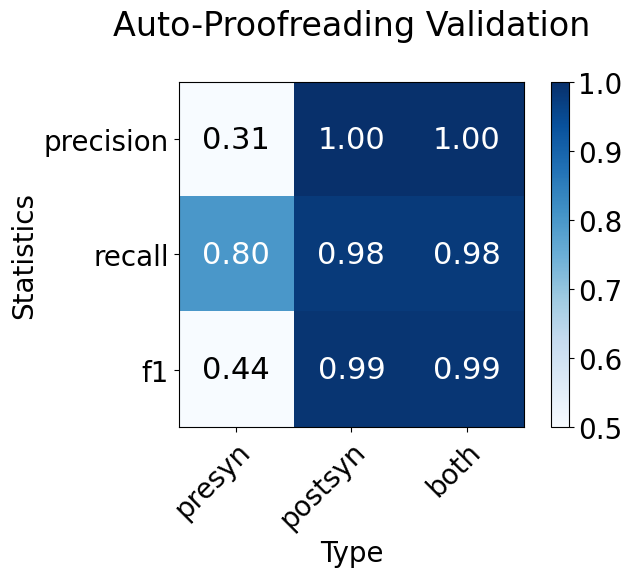

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136008425132_validation_df.pbz2
File size is 0.076714 MB
Total time for neuron 864691136008425132: 1110.5112648010254

--- Working on Neuron 864691135865518469 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1313143.   484061.3  758780.6]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1313143.   484061.3  758780.6] had error branches []--------
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 89, # error presyns = 17
For postsyn: # valid synapses = 5158, # error synapses  = 16, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5263
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 89
n_valid_syn_i

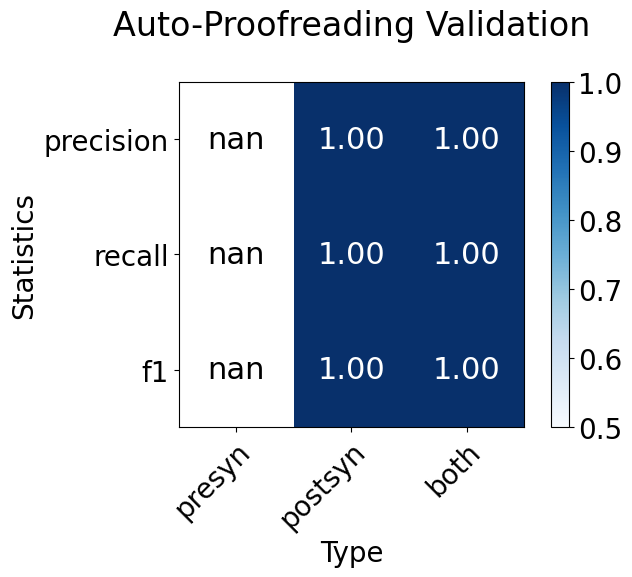

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135865518469_validation_df.pbz2
File size is 0.105265 MB
Total time for neuron 864691135865518469: 88.34585070610046

--- Working on Neuron 864691135945413668 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 108, # error presyns = 9
For postsyn: # valid synapses = 1536, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Segment Id = 864691135945413668
Postsyn counts:
TP:1536
TN:1
FP:0
FN:0
Presyn counts:
TP:0
TN:99
FP:0
FN:0


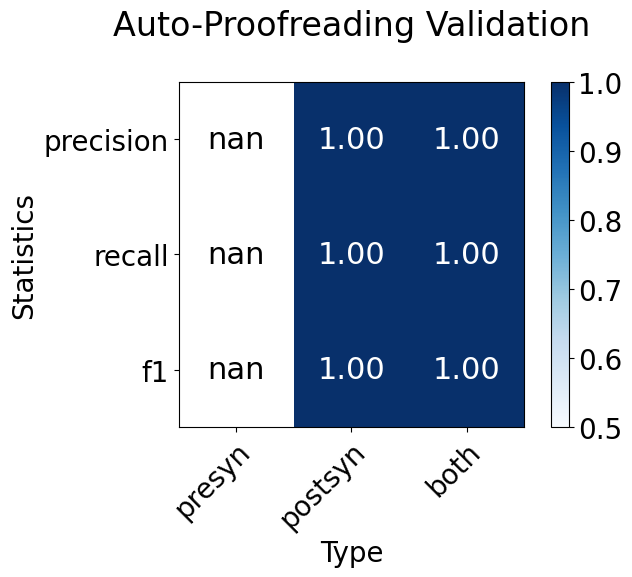

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135945413668_validation_df.pbz2
File size is 0.03361 MB
Total time for neuron 864691135945413668: 34.5028178691864

--- Working on Neuron 864691136003930314 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1157985.67029235  865153.97076866  922305.84373053]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1157985.67029235  865153.97076866  922305.84373053] had error branches []--------


 ----- Working on coordinate 1: [1159164.24612675  836705.0360456   922242.31382708]--------
kiss_check = True
Changing max_degree_to_resolve = 8 because upstream width was 202.98474685292837 
Working on Kissing check because possible upstream matches greater than 1: [10, 29]
winning_downstream = 29,error_downstream = [26 10] 
coordinate [1159164.24612675  836705.0360456   922242.31382708] had error branches [26 10]--------

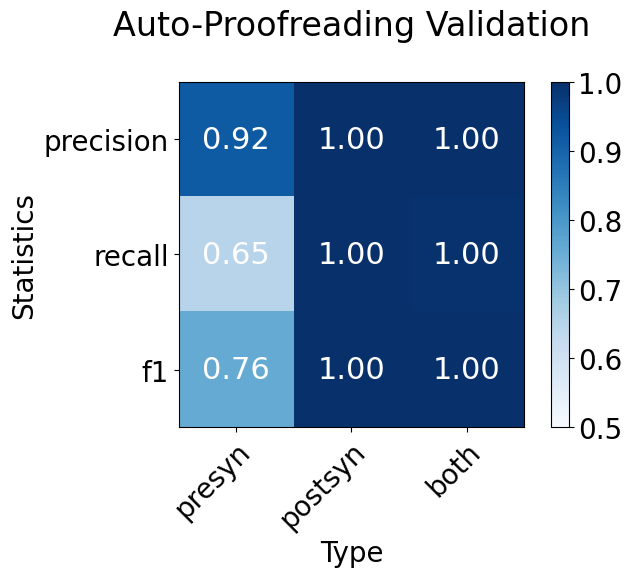

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136003930314_validation_df.pbz2
File size is 0.080814 MB
Total time for neuron 864691136003930314: 145.95319318771362

--- Working on Neuron 864691136194042326 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [633369.46396577 642628.37375774 904286.15810562]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [633369.46396577 642628.37375774 904286.15810562] had error branches []--------


 ----- Working on coordinate 1: [655835.01357908 654071.79933467 886661.69334533]--------
kiss_check = True
winning_downstream = 9,error_downstream = [10 18] 
coordinate [655835.01357908 654071.79933467 886661.69334533] had error branches [10 18]--------


 ----- Working on coordinate 2: [703150.15902442 700224.74801046 786377.94326672]--------
kiss_check = True
winning_downstream = 48,error_downstream = [46 44] 
coordinate [7

** triggered kiss check cut becuase cut_bbox_longest_side = 395.9917936641723***
winning_downstream = 116,error_downstream = [143 103] 
coordinate [720981.3 562902.3 765358.2] had error branches [143 103]--------


 ----- Working on coordinate 9: [728999.61952349 582089.64207094 768015.20907531]--------
kiss_check = True
winning_downstream = 158,error_downstream = [165 171] 
coordinate [728999.61952349 582089.64207094 768015.20907531] had error branches [165 171]--------


 ----- Working on coordinate 10: [733771.5 548121.  740360.2]--------
kiss_check = True
winning_downstream = 182,error_downstream = [183  39] 
coordinate [733771.5 548121.  740360.2] had error branches [183  39]--------


 ----- Working on coordinate 11: [736772.19569597 611850.46123094 775357.26609334]--------
kiss_check = True
winning_downstream = 184,error_downstream = [185 160] 
coordinate [736772.19569597 611850.46123094 775357.26609334] had error branches [185 160]--------


 ----- Working on coordinate 12: [74

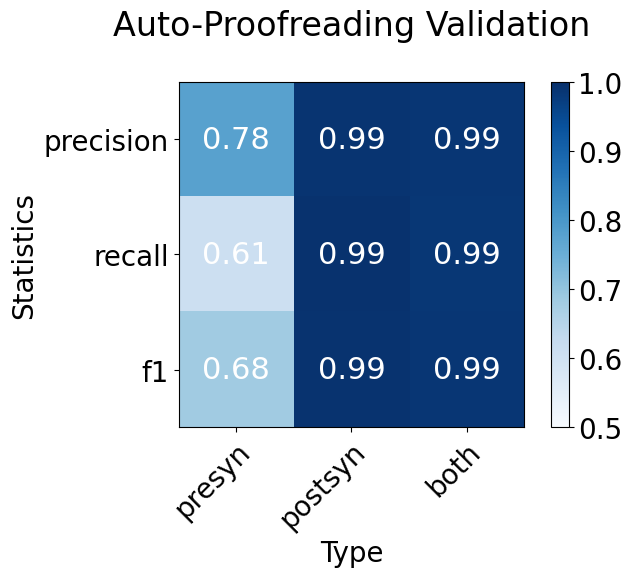

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136194042326_validation_df.pbz2
File size is 0.069138 MB
Total time for neuron 864691136194042326: 132.36551880836487


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")